In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [529]:
##this creates the payouts for each place. Generated from WSOP.com
##tourney details: $500+65, 2000 runners, 300 get paid
def create_pays():
    dist_list = []
    for i in range(1700):
        dist_list.append(0)
    for i in range(21):
        dist_list.append(835)
    for i in range(36):
        dist_list.append(875)
        dist_list.append(930)
        dist_list.append(1001)
        dist_list.append(1092)
        dist_list.append(1206)
    for i in range(9):
        dist_list.append(1348)
        dist_list.append(1526)
        dist_list.append(1748)
        dist_list.append(2028)
        dist_list.append(2379)
        dist_list.append(2825)
        dist_list.append(3393)
        dist_list.append(4123)
        dist_list.append(5066)
    for i in range(3):
        dist_list.append(6295)
        dist_list.append(7910)
        dist_list.append(10049)
    dist_list.append(12905)
    dist_list.append(16752)
    dist_list.append(21977)
    dist_list.append(29136)
    dist_list.append(39030)
    dist_list.append(52825)
    dist_list.append(72227)
    dist_list.append(99761)
    dist_list.append(161422)
    arr = np.array(dist_list)
    np.sort(arr)[::-1]
    return arr



In [530]:
##verify sum and length of payouts array. summing up every result, we get the prize pool of 
#$1000000 and we see that the 2000 starting runners is correct
print sum(create_pays())
len(create_pays())

1000000


2000

In [531]:
#double check array is in the right order
arr = create_pays()
arr[-1]

161422

In [532]:
#the average return for a 30% ROI player
565*1.3

734.5

In [533]:
#This is really equivalent to 47% return from what is committed to the prize pool 
(734.5-500)/500

0.469

<h3>Payout Distribution</h3>
Looking at the graph below, it is very clear why tournament poker is a high variance game. We see that first place gets roughly 16% of the total prize pool. That's 320x your money if you win! The payout structure is extremely top heavy.

[     0      0      0 ...,  72227  99761 161422]


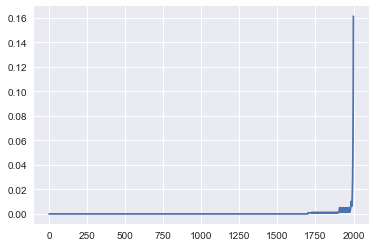

In [526]:
##looking at the initial distribution of payouts. 
arr = create_pays()
plt.plot(arr/1000000.0) #divide by total prize pool for % of purse

<h3>Creating p values for Distribution of results</h3>
We need to create a probability distribution for what place a 30% ROI player will finish in. For 30%, the average return is 735. This is really a return of 1.47x when we factor in the rake (since the amount contributed to prize pool is $500). We need to have different hypotheses for what the probability distribution looks like. We know one thing to be true: the trend for this distribution must be increasing as more people are eliminated for a profitable player. So, let's try out different probability distributions

<h3>General Form of Equation:</h3> <br></br> 
$\sum_{x=0}^{1999} f(x)p(x) = 734.5$<br></br><br></br>
where x is the number of eliminations, f is the payout amount [given x eliminations], and p is the probability of finishing at x eliminations. <br></br> So, if x = 1999, 1999 people have been eliminated. We plug in the payout amount (161,422) and the probability of getting first place (or finishing in the place after 1999 eliminations)


<h3>Case 1-- Linear:</h3> $p(x) = mx+ b$<br></br> 
Let's assume that the probability for each place increases linearly as the number of players eliminated increases. We need to find the set of (m,b)'s where the general form of the equation is satisfied, and find the pair that makes the most sense.

In [556]:
def probs_linear(m,b):
    probs = []
    for x in range(2000):
        probs.append(m*x+b)
    probs = np.array(probs)
    return 1.0*probs/sum(probs)
    

In [557]:
def calc_ev_linear(m,b):
    probs = probs_linear(m,b)
    payouts = create_pays()
    return np.dot(probs,payouts)
        

In [598]:
calc_ev_lin(.05,50.8)

734.51251872984369

Trial and error- this seems fine for our purposes. It assumes that the probability of first is slightly less than 3x more likely than getting last, and increasing linear as eliminations increase.

<h3>Monte Carlo Simulations</h3>
Let's build distributions for different sample sizes and see what they look like. To do this, we can randomly draw from the probability density function, and by law of large numbers, 
we know that these simulated distributions must be approximately equal to the true distributions

In [606]:
#first we have to build the cumulative probability density function
def cum_density_lin():
    probs = np.array(probs_linear(.05,50.8))
    cum_probs = []
    for i in range(1,2001):
        cum_probs.append(sum(probs[:i]))
    return cum_probs

In [ ]:
def monte_linear():
   

In [609]:
print cum_density_lin()

[0.00025204663855122797, 0.00050434135450260474, 0.0007568841478541304, 0.0010096750186058049, 0.0012627139667576283, 0.0015160009923096006, 0.0017695360952617216, 0.0020233192756139917, 0.0022773505333664105, 0.0025316298685189782, 0.0027861572810716946, 0.0030409327710245598, 0.0032959563383775739, 0.0035512279831307367, 0.0038067477052840483, 0.0040625155048375087, 0.0043185313817911183, 0.0045747953361448762, 0.0048313073678987834, 0.0050880674770528399, 0.0053450756636070447, 0.0056023319275613987, 0.005859836268915901, 0.0061175886876705526, 0.0063755891838253526, 0.0066338377573803018, 0.0068923344083354002, 0.0071510791366906469, 0.0074100719424460429, 0.0076693128256015873, 0.0079288017861572808, 0.0081885388241131236, 0.0084485239394691148, 0.0087087571322252543, 0.0089692384023815422, 0.0092299677499379802, 0.0094909451748945665, 0.0097521706772513012, 0.010013644257008186, 0.010275365914165219, 0.010537335648722401, 0.01079955346067973, 0.01106201935003721, 0.01132473331679